### Create Directed Graph 'D' with 5 Nodes and 5 Edges

number of nodes:  5
number of edges:  5


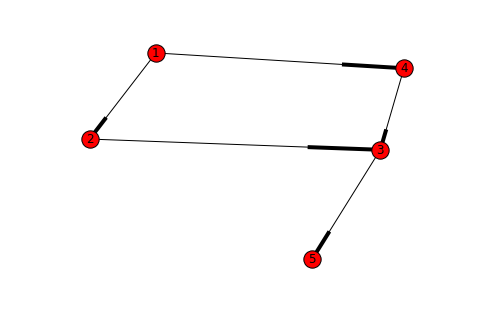

In [33]:
# makes plots appear in python
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

D = nx.DiGraph()
D.add_nodes_from([1,2,3,4,5])
D.add_edges_from([(1,2),(1,4),(2,3),(4,3),(3,5)])

print 'number of nodes: ', D.number_of_nodes()
print 'number of edges: ', D.number_of_edges()

nx.draw(D, with_labels=True)
plt.show()

### Convert from Directed Graph 'D' to Undirected Graph 'U'

number of nodes:  5
number of edges:  5


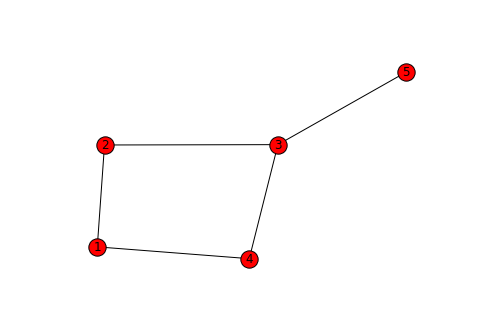

In [5]:
U = D.to_undirected()

print 'number of nodes: ', U.number_of_nodes()
print 'number of edges: ', U.number_of_edges()
nx.draw(U, with_labels=True)
plt.show()

### Comparing Closeness Centrality between 'D' and 'U'

In [23]:
close_cent_dict_D = nx.closeness_centrality(D)
close_cent_dict_U = nx.closeness_centrality(U)

print 'Closeness Centrality Values for Nodes in D:'
print close_cent_dict_D
print 'Closeness Centrality Values for Nodes in U:'
print close_cent_dict_U

Closeness Centrality Values for Nodes in D:
{1: 0.5714285714285714, 2: 0.3333333333333333, 3: 0.25, 4: 0.3333333333333333, 5: 0.0}
Closeness Centrality Values for Nodes in U:
{1: 0.5714285714285714, 2: 0.6666666666666666, 3: 0.8, 4: 0.6666666666666666, 5: 0.5}


In [77]:
close_cent_dict_D = nx.closeness_centrality(D)
close_cent_dict_U = nx.closeness_centrality(U)

data_D = {'Closeness Centrality Values for D': close_cent_dict_D.values()}
df_D = pd.DataFrame(data_D, index = close_cent_dict_D.keys())
df_D


,Closeness Centrality Values for D
1,0.571429
2,0.333333
3,0.250000
4,0.333333
5,0.000000


In [78]:
data_U = {'Closeness Centrality Values for U': close_cent_dict_U.values()}
df_U = pd.DataFrame(data_U, index = close_cent_dict_U.keys())
df_U

,Closeness Centrality Values for U
1,0.571429
2,0.666667
3,0.800000
4,0.666667
5,0.500000


### Comparing Eigenvector Centrality between 'D' and 'U' Attempt #1
##### This fails but worked on our uncleaned, SCOTUS network with ~60,000 cases/nodes (why?)

In [9]:
eigen_cent_dict_D = nx.eigenvector_centrality(D)
eigen_cent_dict_U = nx.eigenvector_centrality(U)

print 'Eigenvector Centrality Values for Nodes in D:'
print eigen_cent_dict_D
print 'Eigenvector Centrality Values for Node sin U:'
print eigen_cent_dict_U

NetworkXError: eigenvector_centrality():
power iteration failed to converge in %d iterations."%(i+1))

### Comparing Eigenvector Centrality between 'D' and 'U' Attempt #2 (increase max_iteration from 100 to 1000)
##### This fails, and so does many other iterations (200, 300, 400, 500, 600, 700, 800, 900, etc.)

In [13]:
eigen_cent_dict_D = nx.eigenvector_centrality(D, max_iter=1000)
eigen_cent_dict_U = nx.eigenvector_centrality(U, max_iter=1000)

print 'Eigenvector Centrality Values for Nodes in D:'
print eigen_cent_dict_D
print 'Eigenvector Centrality Values for Node sin U:'
print eigen_cent_dict_U

NetworkXError: eigenvector_centrality():
power iteration failed to converge in %d iterations."%(i+1))

### Comparing Eigenvector Centrality between 'D' and 'U' Attempt #3 (use 'eigenvector_centrality_numpy()')
##### This fails, and I suggest NOT using eigenvector_centrality_numpy() because I ran this on 1980s SCOTUS, and the values kept changing every time I ran it

In [17]:
eigen_cent_dict_D = nx.eigenvector_centrality_numpy(D)
eigen_cent_dict_U = nx.eigenvector_centrality_numpy(U)

print 'Eigenvector Centrality Values for Nodes in D:'
print eigen_cent_dict_D
print 'Eigenvector Centrality Values for Node sin U:'
print eigen_cent_dict_U

ArpackNoConvergence: ARPACK error -1: No convergence (51 iterations, 0/1 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]

### Comparing Betweenness Centrality between 'D' and 'U'

In [21]:
between_cent_dict_D = nx.betweenness_centrality(D)
between_cent_dict_U = nx.betweenness_centrality(U)

print 'Betweenness Centrality Values for Nodes in D:'
print between_cent_dict_D
print 'Betweenness Centrality Values for Nodes in U:'
print between_cent_dict_U

Betweenness Centrality Values for Nodes in D:
{1: 0.0, 2: 0.08333333333333333, 3: 0.25, 4: 0.08333333333333333, 5: 0.0}
Betweenness Centrality Values for Nodes in U:
{1: 0.08333333333333333, 2: 0.16666666666666666, 3: 0.5833333333333333, 4: 0.16666666666666666, 5: 0.0}


### Comparing Page Rank between 'D' and 'U'

In [25]:
page_rank_dict_D = nx.pagerank(D)
page_rank_dict_U = nx.pagerank(U)

print 'Page Rank Values for Nodes in D:'
print page_rank_dict_D
print 'Page Rank Values for Nodes in U:'
print page_rank_dict_U

Page Rank Values for Nodes in D:
{1: 0.08943214803276803, 2: 0.12744107720395542, 3: 0.30608323633097334, 4: 0.12744107720395542, 5: 0.3496024612283479}
Page Rank Values for Nodes in U:
{1: 0.1977795471363229, 2: 0.1973886196092952, 3: 0.2941112913345175, 4: 0.1973886196092952, 5: 0.11333192231056896}


### Comparing Hubs and Authorities between 'D' and 'U'

In [32]:
hubs_auths_dict_D = nx.hits(D)
hubs_auths_dict_U = nx.hits(U)

print 'Hubs Values for Nodes in D:'
print hubs_auths_dict_D[0]
print 'Hubs Values for Nodes in U:'
print hubs_auths_dict_U[0]

print ''
print 'Authority Values for Nodes in D:'
print hubs_auths_dict_D[1]
print 'Authority Values for Nodes in U:'
print hubs_auths_dict_U[1]

Hubs Values for Nodes in D:
{1: 0.333333332505491, 2: 0.333333332505491, 3: 2.48352685947337e-09, 4: 0.333333332505491, 5: 0.0}
Hubs Values for Nodes in U:
{1: 0.1798058984136134, 2: 0.2302911523795799, 3: 0.2302911523795799, 4: 0.2302911523795799, 5: 0.1293206444476469}

Authority Values for Nodes in D:
{1: 0.0, 2: 0.24999999906867743, 3: 0.49999999813735485, 4: 0.24999999906867743, 5: 3.7252902845841263e-09}
Authority Values for Nodes in U:
{1: 0.21922359345683257, 2: 0.19519410163579187, 3: 0.2807764065431675, 4: 0.19519410163579187, 5: 0.10961179672841628}
